# **Image Generation and Diffusion Models: A Hands-On Guide with Hugging Face**

**A practical tutorial for developers and enthusiasts on using state-of-the-art diffusion models via the Hugging Face ecosystem.**

-----

In this notebook, we will explore the fascinating world of AI-powered image generation. We'll demystify **Diffusion Models**, the technology behind many state-of-the-art text-to-image tools, and show you how to easily leverage them using the Hugging Face `diffusers` library.

### **Table of Contents**

1.  **What are Diffusion Models? A Quick Overview**
      * The Core Idea: From Noise to Art
2.  **Setting Up Your Environment**
      * Installation and Requirements
3.  **The Hugging Face `diffusers` Library**
      * Pipelines: The Easiest Way to Get Started
4.  **Task 1: Text-to-Image Generation (The Basics)**
      * Creating an Image from a Simple Prompt
5.  **Task 2: Image-to-Image Generation**
      * Transforming an Existing Image with a Prompt
6.  **Task 3: Inpainting**
      * Editing and Replacing Parts of an Image
7.  **Exploring Further: Schedulers and Model Variations**
      * A Glimpse into Advanced Control

-----

## 1\. What are Diffusion Models? A Quick Overview

Diffusion models are a class of generative models that create high-quality images by reversing a process of controlled noise addition.

The core idea can be broken down into two steps:

1.  **Forward Process (Noising):** Start with a clean image. Gradually and methodically add a small amount of noise over many steps until you are left with pure random noise. This process is easy and mathematically defined.

2.  **Reverse Process (Denoising):** This is where the magic happens. A neural network is trained to *undo* one step of the noising process. It learns to predict the noise that was added and subtract it. By repeating this denoising step over and over, starting from pure random noise, the model can generate a brand new, clean image.

To guide this process (e.g., with a text prompt), the model is given additional context during the denoising steps, steering the final image towards the desired concept.

-----

## 2\. Setting Up Your Environment

To get started, you'll need to install the necessary libraries from Hugging Face, along with PyTorch.

**Note on Hardware:** Diffusion models are computationally intensive. It is **highly recommended** to run this code on a machine with a modern NVIDIA GPU (at least 8GB of VRAM). A great way to start for free is by using a Google Colab notebook with a GPU runtime.

In [1]:
# In your terminal or a Jupyter cell, run the following command:
!pip install diffusers transformers accelerate torch

-----

## 3\. The Hugging Face `diffusers` Library

The `diffusers` library is a fantastic toolkit that provides standardized access to hundreds of diffusion models. The easiest way to interact with these models is through **`Pipelines`**. A pipeline wraps all the necessary components (the model, tokenizer, scheduler) into a single, easy-to-use class for a specific task.

-----

## 4\. Task 1: Text-to-Image Generation (The Basics)

Let's start with the most common task: creating an image from a text prompt. We will use the classic **Stable Diffusion v1.5** model.

Using device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

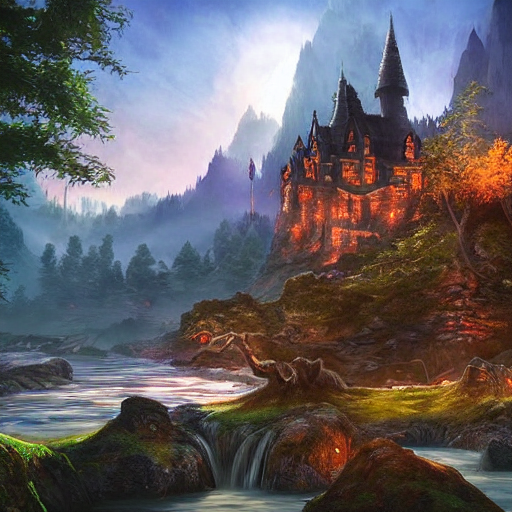

In [2]:
# Import necessary libraries
import torch
from diffusers import StableDiffusionPipeline

# Check if a GPU is available and set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the pre-trained Stable Diffusion pipeline
# The model will be downloaded from the Hugging Face Hub the first time you run this
# It's recommended to use float16 for memory efficiency on GPUs
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

# Define our creative prompt
prompt = "A high-quality fantasy landscape, with a glowing castle on a mountain, a river, and a forest, cinematic lighting"

# Generate the image
# This can take a few seconds to a minute depending on your GPU
image = pipe(prompt).images[0]

# Display the image (if in a Jupyter Notebook)
display(image)

# To save the image
# image.save("fantasy_landscape.png")

### Expected Output:

You should see a generated image that matches the description in the prompt. Each time you run it, you'll get a different variation\!

-----

## 5\. Task 2: Image-to-Image Generation

What if you have a starting image and want to transform it? That's what `img2img` is for. Let's take a simple sketch and turn it into a detailed photo.

First, you'll need a starting image. You can create a simple one with any drawing tool or find one online.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Initial Image:


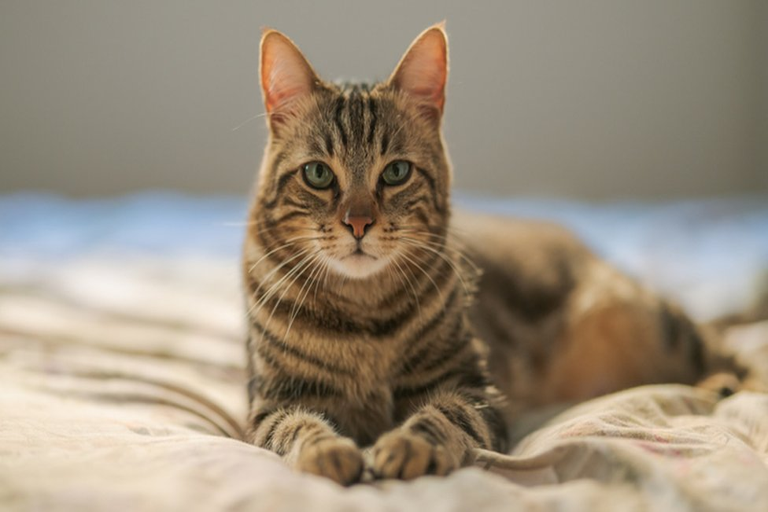

  0%|          | 0/37 [00:00<?, ?it/s]


Transformed Image:


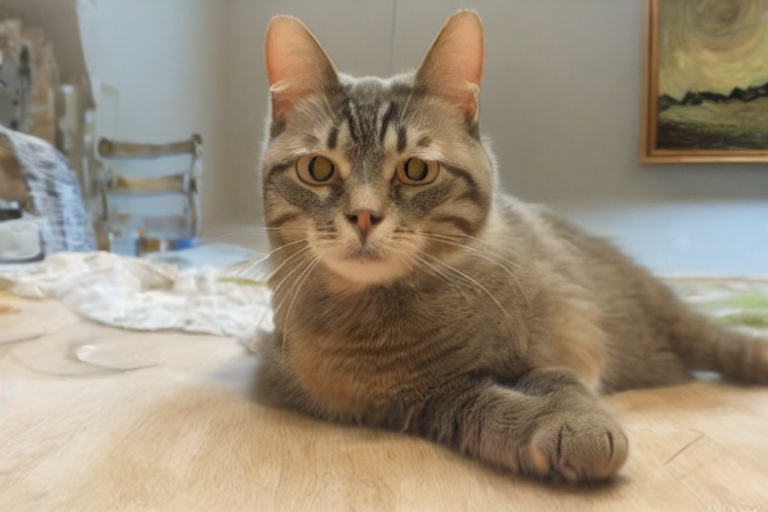

In [3]:
# Import necessary libraries
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
from io import BytesIO

# --- Setup: Load the pipeline and the initial image ---
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the Image-to-Image pipeline
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

# Load a starting image from a URL (or from a local file)
url = "https://c.files.bbci.co.uk/12A9B/production/_111434467_gettyimages-1143489763.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

# Display the initial image
print("Initial Image:")
display(init_image)

# --- Generation ---
prompt = "A cat in the style of Van Gogh's Starry Night"

# Generate the new image based on the initial image and prompt
# `strength` controls how much the new image will adhere to the original (0.0-1.0)
# A lower value means more changes.
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

# Display the transformed image
print("\nTransformed Image:")
display(image)

### Expected Output:

First, you'll see the original photo of the cat. Below it, you'll see a new image where the cat and the scene have been re-imagined in the artistic style of Van Gogh, while still retaining the basic composition of the original image.

-----

## 6\. Task 3: Inpainting

Inpainting allows you to selectively edit a part of an image. You provide the original image, a "mask" image (where the white area is what you want to replace), and a prompt describing what to fill that area with.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Original Image:


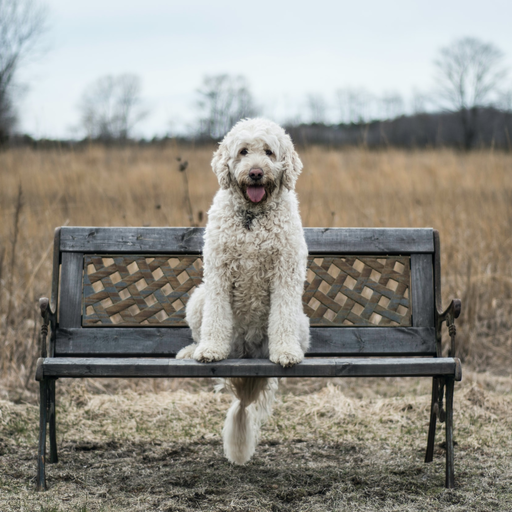


Mask (area to be replaced is white):


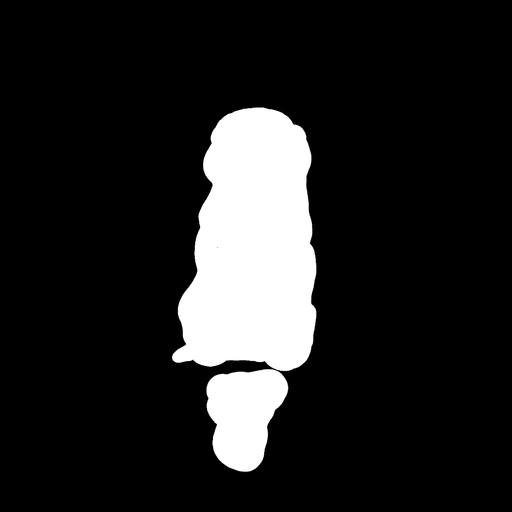

  0%|          | 0/50 [00:00<?, ?it/s]


Inpainted Image:


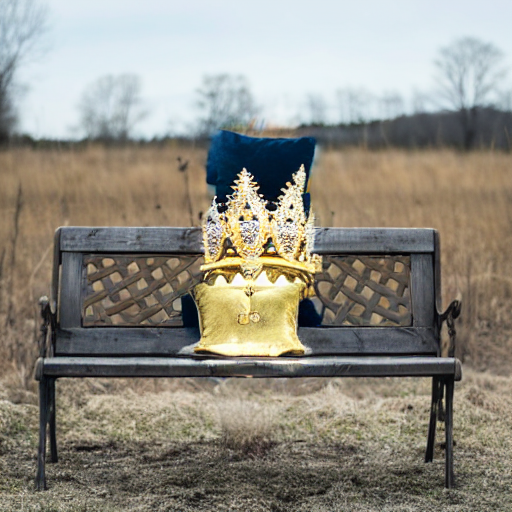

In [4]:
# Import necessary libraries
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import requests
from io import BytesIO

# --- Setup: Load the pipeline and images ---
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
)
pipe = pipe.to(device)

# For this example, we need an image and a corresponding mask.
# Let's use example images provided by Hugging Face.
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB").resize((512, 512))
mask_image = Image.open(requests.get(mask_url, stream=True).raw).convert("RGB").resize((512, 512))

print("Original Image:")
display(image)
print("\nMask (area to be replaced is white):")
display(mask_image)

# --- Generation ---
prompt = "A majestic golden crown on a velvet cushion"

# Generate the new image
new_image = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]

print("\nInpainted Image:")
display(new_image)

### Expected Output:

You'll see the original image of a person sitting on a bench. Then you'll see the mask, which covers the person. Finally, the output image will show the bench and background intact, but the person will be replaced by a majestic golden crown, as described in the prompt.

-----

## 7\. Exploring Further: Schedulers

The **scheduler** is a key component that controls how the noise is removed at each step of the reverse process. Different schedulers can produce slightly different results, and some are faster than others. The `diffusers` library makes it easy to swap them.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

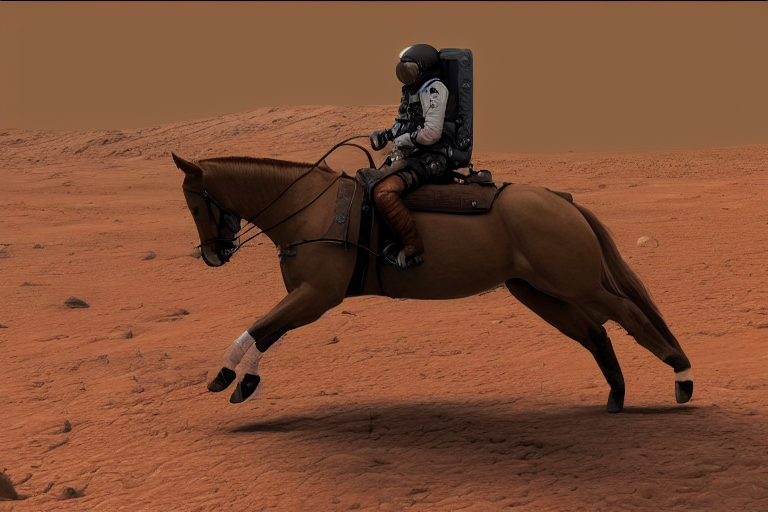

In [5]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "runwayml/stable-diffusion-v1-5"

# Load the pipeline as before
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

# Now, let's change the scheduler to a faster one, EulerDiscreteScheduler
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "An astronaut riding a horse on Mars, photorealistic"

# Generate the image with the new scheduler
image = pipe(prompt, height=512, width=768).images[0]

display(image)

This gives you a glimpse into the modularity of the library. You can experiment with different schedulers to find a balance between speed and quality that works for your application.